<body>
    <div class="alert alert-block alert-success">
    <font face = "courier" size = "+4"> <b>Diabetes Data Analysis</b></font>
    <p><font face = "courier" size = "+1">
        Author: Alaittin Kirtisoglu
        </font>
    </p>
    <p><font face = "courier" size = "+1">
        Date: Nov 18, 2024
        </font>
    </p>
    <p></p>
    <hr />
    <a id = '0'></a><font face = "courier" size = "+2">Table of Contents</font>
    <ol>
      <li><a href="#1">Introduction</a></li>
      <ul>
        <li><a href="#1.1">Problem Statement</a></li>
        <li><a href="#1.2">Data Description</a></li>
      </ul>
      <li><a href="#2">Basic Exploration</a></li>
      <ul>
        <li><a href="#2.1">Importing Libaries</a></li>
        <li><a href="#2.2">Datasets</a></li>
      </ul>
      <li><a href="#3">Data Preprocessing</a></li>
      <li><a href="#3">Feature Selection</a></li>
      <li><a href="#4">Machine Learning Models</a></li>
      <ul>
        <li><a href="#4.1">Logistic Regression</a></li>
        <li><a href="#4.2">K-nearest Neighbors</a></li>
        <li><a href="#4.3">Gaussian Model</a></li>
        <li><a href="#4.4">Decision Tree</a></li>
        <li><a href="#4.5">Random Forest</a></li>
        <li><a href="#4.6">XGBoost</a></li>
        <li><a href="#4.7">Neural Network</a></li>
        <li><a href="#4.8">Support Vector Classifier</a></li>
        <li><a href="#4.9">AdaBoost</a></li>
        <li><a href="#4.10">Gradient Boosting</a></li>
      </ul>
      <li><a href="#5">Conclusion</a></li>
      <li><a href="#6">Author Message</a></li>
    </ol>
    </div>
</body>

<div class="alert alert-block alert-info">
   <a id='1'></a><font face = "courier" size = "+3"> 1|Introduction</font>
</div>

> <a id='1.1'></a><font face = "courier" size = "+2" color = "white"> 1.1|Problem Statement</font>

<style>
    blockquote {
        background-color: #006969;
        color: #fff;
        border: 2px white;
        border-radius: 8px;
        font-weight: 500;
        padding: 8px;
    }
</style>

<body>
   <blockquote>
   <p>Evaluate: KNeighborsClassifier: Before Tunning</p>
   <p>Training Accuracy - 80.0%</p>
   <p>Validation Accuracy - 66.00%</p>
   </blockquote>
</body>

In [1]:
import matplotlib.pyplot as mplt
import pandas as pd
import numpy as np
import geopandas as gpd
from functools import partial
#from tqdm import tqdm

from helper import DataHandler, Plot, plot_grid
from functools import partial

from partition import Partition, GeographicPartition
from markovchain import SingleMetricOptimizer

from markovchain import recom

from grid import Grid


In [ ]:
grid = Grid(dimensions=(10,10), num_candidates=20, density='opposite', threshold=(5,0))

In [3]:
graph = grid.graph
graph.nodes

NodeView(((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)))

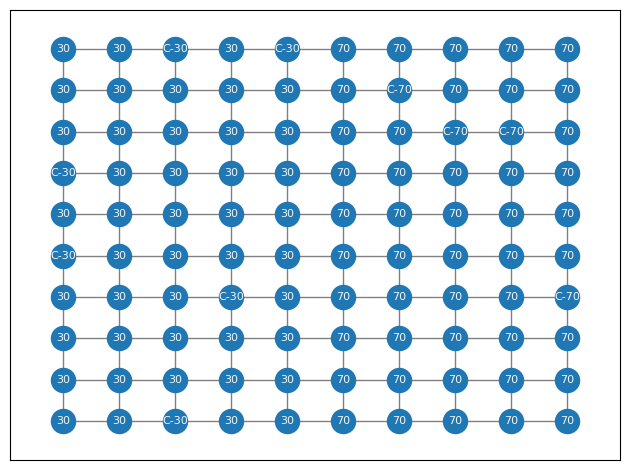

In [4]:
plot_grid(grid.graph)

In [6]:
import travel_time as travel

candidates = {node for node in graph.nodes if graph.nodes[node]['candidate']==True}

for u, v in graph.edges():
    graph[u][v]['time'] = 10
    
travels = travel.travel_time(graph, candidates)

In [5]:
"Initial partition"
pop = sum(graph.nodes[node]['population'] for node in graph.nodes)
area = sum(graph.nodes[node]['area'] for node in graph.nodes)   
#area 
#avg_density = area / pop

# nodelarin density check i burda yapilip sonuc attribute olarak atansin. Attribute ismi simdilik density

column_names = ['population', 'area', 'candidate', 'avg_density'] # avg_density attribute ata. If density is not considered, then we have to pass false.
#check_density = ?

import partition
my_updaters = {
    "population": partition.Tally(column_names[0], alias="population"),
    "cut_edges": partition.cut_edges,
    "perimeter": partition.perimeter,
    "area": partition.Tally("area", alias="area"),}

In [8]:
initial_solution = Partition.from_random_assignment(
travel_times=travels,
graph=graph,
capacity_level = 1,
epsilon=0.01,
column_names = column_names,
pop_target = pop // 4,
#density = 0.5,
updaters=my_updaters)

--------------iteration starts
remaining pop 5000
number of facility valid nodes 42
number of pop and facility valid nodes 0
only pop valid 0
ideal pop 1250.0
epsilon 0.01
root pop 5000
root facility True
complement facility valid or root 0
plus complement pop vali or root 0
--------------iteration ends
cut is empty
--------------iteration starts
remaining pop 5000
number of facility valid nodes 55
number of pop and facility valid nodes 3
only pop valid 0
ideal pop 1250.0
epsilon 0.01
root pop 5000
root facility True
complement facility valid or root 0
plus complement pop vali or root 0
--------------iteration ends
Created district 1
--------------iteration starts
remaining pop 3740
number of facility valid nodes 44
number of pop and facility valid nodes 0
only pop valid 0
ideal pop 1245.0
epsilon 0.006024096385542169
root pop 3740
root facility True
complement facility valid or root 0
plus complement pop vali or root 0
--------------iteration ends
cut is empty
--------------iteration 